In [2]:
################################################
#
#  HOMEWORK1
#
###############################################

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


In [3]:
#
# PROBLEM 1.2
#
print("-------------------------------------------------")
print("                PROBLEM 1.2                      ")
print("-------------------------------------------------\n")
gamma_ray_data = pd.read_csv("Homework1/data_and_materials/gamma-ray.csv")
print("------------ Dataset: Gamma Ray CSV ", gamma_ray_data.shape)
print(gamma_ray_data.head(n=20))
print("------------ Info")
print(gamma_ray_data.info())
# The null zero Hypothesis H0 we want to test is:
# Lambda_i = Lambda_j = constant for each i,j in the dataset
#
# The alternative Hypothesis H1 is
# We have at least one pair i,j for which Lambda_i != Lambda_j 
#
# Assumptions:
# 1) we assume all samples are independent
# 2) we assume the number of gamma rays follows a Poisson distribution G_i follows Poisson(lambda_i)
#    From the MLE under H0 we get that the most likely value is 
print("----------------------------")
lambda_0 = gamma_ray_data['count'].sum() / gamma_ray_data['seconds'].sum()
gamma_ray_data['H1_lambda'] = gamma_ray_data['count'] / gamma_ray_data['seconds']
print("Lambda_0 as the value of lambda MLE under H0 is: ",lambda_0)
print("----------------------------")
#
# we want to build a log likelihood test
# so our test statistic is L(x) = -2 * log ( max(Likelihood under H0) / max(Likelihood under HA) ) 
# The test statistic behaves like a Chi square with N-1 degrees of freedom this gives me the regiection region for a Log likelihood test
from scipy.stats import chi2
from scipy.stats import poisson
df = 99 
alpha = 0.05
p_value = chi2.ppf([1-alpha],df=df)
print(f"Quantile of a Chisquare with {df} df for significance level alpha: {alpha} is : {p_value}")
print("And to confirm...")
print(f"CDF of a chisquare with {df} d.f. for value:{p_value} is : {chi2.cdf([p_value],df=df)}")
#
# 
print("----------------------------")
print("To find the value of the test statistics we need to:")
print("1) Find the numerator: this is the likelihood of the results under H0 lambda: {lambda_0}")
print("   we use scipy.stats poisson to get for each value in teh dataset the related probability")
print("   we add the values to the df as a new column: H0_p")
print("2) Find the denominator: this is the likelihood of the results under H1 lambda; in this case we compute")
print("   the values of each point using the lambda w got for that specific point")
print("   we add the values to the df as a new column")
print("   we add the values to the df as a new column: H1_p")
print("")
#
# note: mu here is lambda
from math import log
gamma_ray_data['H0_p'] = poisson.pmf(gamma_ray_data['count'].astype(int), mu=lambda_0)
gamma_ray_data['H1_p'] = poisson.pmf(gamma_ray_data['count'].astype(int), mu=gamma_ray_data['H1_lambda'])
#
#
Num = np.prod(gamma_ray_data['H0_p'])
Den = np.prod(gamma_ray_data['H1_p'])
#
#
print("Results are: ")
print(f"Numerator: {Num}")
print(f"Denominator: {Den}")
print(f"Log (Num/Den): {log(Num/Den)}" )
Tn = -2 * log(Num/Den)
print(f"Test statstic Tn: {Tn}")
print(f"CDF of a chisquare with {df} d.f. for value:{Tn} is : {chi2.cdf([Tn],df=df)}")


-------------------------------------------------
                PROBLEM 1.2                      
-------------------------------------------------

------------ Dataset: Gamma Ray CSV  (100, 2)
    seconds  count
0     116.0    0.0
1     112.0    0.0
2     160.0    0.0
3      51.5    0.0
4     102.0    1.0
5      77.4    0.0
6      14.5    0.0
7    1070.0    3.0
8      99.1    1.0
9      49.6    0.0
10     50.8    0.0
11     77.2    0.0
12    114.0    0.0
13    165.0    0.0
14    106.0    0.0
15     52.9    0.0
16    104.0    2.0
17     51.0    2.0
18     51.4    0.0
19    316.0    2.0
------------ Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   seconds  100 non-null    float64
 1   count    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None
----------------------------
Lambda_0 as the value of lambda MLE under H0 is:  0.00388

Quantile of a Chisquare with 99 df for significance level alpha: 0.05 is : [123.22522145]
And to confirm...
CDF of a chisquare with 99 d.f. for value:[123.22522145] is : [[0.95]]
----------------------------
To find the value of the test statistics we need to:
1) Find the numerator: this is the likelihood of the results under H0 lambda: {lambda_0}
   we use scipy.stats poisson to get for each value in teh dataset the related probability
   we add the values to the df as a new column: H0_p
2) Find the denominator: this is the likelihood of the results under H1 lambda; in this case we compute
   the values of each point using the lambda w got for that specific point
   we add the values to the df as a new column
   we add the values to the df as a new column: H1_p

Results are: 
Numerator: 1.1839606440683739e-161
Denominator: 5.3567306490191885e-139
Log (Num/Den): -52.16636058521094
Test statstic Tn: 104.33272117042188
CDF of a chisquare with 99 d.f. for value:104.33272117042188 is : [0.

In [55]:
#
# PROBLEM 1.4
#
 #The data set golub consists of the expression levels of 3051 genes for 38 tumor mRNA samples. 
# Each tumor mRNA sample comes from one patient (i.e. 38 patients total),
# and 27 of these tumor samples correspond to acute lymphoblastic leukemia (ALL) 
# and the remaining 11 to acute myeloid leukemia (AML).
# Note:
# - golub.csv does not tell which patient is which category.. you have to refer to:
#    - golub_DESCRIPTION.txt: ALL code 0, AML code 1
#    - golub_cl.csv

df = pd.read_csv("Homework1/data_and_materials/golub_data/golub.csv")
golub_cl = pd.read_csv("Homework1/data_and_materials/golub_data/golub_cl.csv")
print("-------------------------------------------------")
print("                PROBLEM 1.4                      ")
print("-------------------------------------------------\n")
print("------------\nDataset: Golubc.sv shape:", df.shape)
print(f" # of genes: {df.shape[0] - 1}") # removing header column
print(f" # of cases: {df.shape[1] - 1}") # removing index column
# print(df.head(n=10))
#
# This prepares 2 filter:
# ALL and AML, they have True if we want the column in that poisition
# it actually seems we are not doing anything with the ALL code so commenting out related lines
column_filter_ALL = [  ]
column_filter_AML = [  ]
for index,x in enumerate(golub_cl['x']):
    if x == 1: 
        column_filter_AML.append(df.columns[index+1])
    elif x == 0:
        column_filter_ALL.append(df.columns[index+1])

print("\nSplitting df into 2 based on AML (1) or (0) ALL identifier from golub_cl.csv:\n")
#print(f"Columns for ALL: {column_filter_ALL}")
print(f"Columns for ALL: {column_filter_AML}\n")
df_AML = df.filter(column_filter_AML, axis=1) 
df_ALL = df.filter(column_filter_ALL, axis=1)
print(f"ALL Dataframe shape: {df_ALL.shape}")
print(f"AML Dataframe shape: {df_AML.shape}\n")
N_ALL = df_ALL.shape[1]
N_AML = df_AML.shape[1]
#
#
print("-----------------------------")
# Find parameters: 
# X_all: mean for all the data
# X_AML: mean for the AML data
# X_ALL: mean for the ALL data
# S_all: standard error for all the data
# S_AML: standard error for AML data
# S_ALL: standard error for ALL data
#
# we add each parameter to the related dataframework
# so at the end, th3 df will each have 2 new columns
#
#
#
# normally the mean would be computed per column, by setting axis = 1 we do it per row
# we also need to exclude the first column which is an index
# Note that df_AML and df_ALL don't have the index column.. so we can just go for it
print("Adding Mean, Sample Standard Error columns, Mean Variance to all Dataframes..")
df_ALL['X_ALL']  = df_ALL.mean(axis=1)
df_AML['X_AML'] = df_AML.mean(axis=1) 
#
# we just added a column but we need to keep it out from the standard deviation calculation..
df_ALL['S_ALL']  = df_ALL[df_ALL.columns.tolist()[:-1]].std(axis=1)
df_AML['S_AML'] = df_AML[df_AML.columns.tolist()[:-1]].std(axis=1) 
#
# The mean variance is given by divigind the sample variance by N
df_ALL['Variance_X_ALL']  = df_ALL['S_ALL'].apply(np.square) / N_ALL
df_AML['Variance_X_AML'] = df_AML['S_AML'].apply(np.square) / N_AML
print("Done..")
print("--------------------------")
#
df_ALL.to_csv("H1.csv")
df_ALL

-------------------------------------------------
                PROBLEM 1.4                      
-------------------------------------------------

------------
Dataset: Golubc.sv shape: (3051, 39)
 # of genes: 3050
 # of cases: 38

Splitting df into 2 based on AML (1) or (0) ALL identifier from golub_cl.csv:

Columns for ALL: ['V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38']

ALL Dataframe shape: (3051, 27)
AML Dataframe shape: (3051, 11)

-----------------------------
Adding Mean, Sample Standard Error columns, Mean Variance to all Dataframes..
Done..
--------------------------


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,X_ALL,S_ALL,Variance_X_ALL
0,-1.45769,-1.39420,-1.42779,-1.40715,-1.42668,-1.21719,-1.37386,-1.36832,-1.47649,-1.21583,...,-1.06221,-1.12665,-1.20963,-1.48332,-1.25268,-1.27619,-1.23051,-1.271510,0.322304,0.003847
1,-0.75161,-1.26278,-0.09052,-0.99596,-1.24245,-0.69242,-1.37386,-0.50803,-1.04533,-0.81257,...,-1.06221,-1.12665,-1.20963,-1.12185,-0.65264,-1.27619,-1.23051,-0.909814,0.409918,0.006223
2,0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,0.44201,...,0.21952,-0.72267,0.51690,0.28577,0.61937,0.20085,0.29278,0.266578,0.462781,0.007932
3,3.13533,0.21415,2.08754,2.23467,0.93811,2.24089,3.36576,1.97859,2.66468,-1.21583,...,-1.06221,3.69445,3.70837,-1.48332,2.36698,-1.27619,2.89604,0.998514,1.924423,0.137163
4,2.76569,-1.27045,1.60433,1.53182,1.63728,1.85697,3.01847,1.12853,2.17016,-1.21583,...,-1.06221,3.52458,3.70837,-1.48332,1.79168,-1.27619,2.24892,0.685679,1.844072,0.125948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,0.04695,0.48704,0.72170,0.58403,0.30600,1.10563,0.59002,0.30773,0.46515,0.88991,...,0.57491,0.19498,1.07628,0.37532,0.01405,0.49138,0.74901,0.421062,0.320073,0.003794
3047,-0.20467,-0.07832,-1.00615,-0.88748,0.07175,-0.71376,-0.98900,-0.36098,-0.99075,-1.20668,...,-1.06221,-0.24490,-0.66182,-0.62739,0.25076,1.70638,-1.23051,-0.369501,0.759279,0.021352
3048,0.45231,0.42686,0.67579,0.31524,-0.57779,0.51322,0.89885,1.26549,0.24663,0.38565,...,-0.38991,1.07012,0.55371,0.26707,0.91343,0.68704,0.43196,0.403783,0.464311,0.007985
3049,-0.35920,-0.43633,0.34031,-0.90930,-0.36663,-0.07845,0.09493,-0.00563,-0.32967,-0.03974,...,-0.95002,0.20204,-0.03522,-0.20401,-1.25268,-0.22244,0.57291,-0.371034,0.528538,0.010346


In [54]:
df_AML

,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,X_AML,S_AML,Variance_X_AML
0,-1.43337,-1.08902,-1.29865,-1.26183,-1.44434,1.10147,-1.34158,-1.22961,-0.75919,0.84905,-0.66465,-0.779247,0.904979,0.074453
1,-1.18065,-1.08902,-1.05094,-1.26183,-1.25918,0.97813,-0.79357,-1.22961,-0.71792,0.45127,-0.45804,-0.691942,0.749853,0.051116
2,0.26624,-0.43377,-0.10823,-0.29385,0.05067,1.69430,-0.12472,0.04609,0.24347,0.90774,0.46509,0.246639,0.606501,0.033440
3,0.71990,0.29598,-1.29865,2.76869,2.08960,0.70003,0.13854,1.75908,0.06151,1.30297,0.58186,0.829046,1.113894,0.112796
4,0.02799,-1.08902,-1.29865,2.00518,1.17454,-1.47218,-1.34158,1.55086,-1.18107,1.01596,0.15788,-0.040917,1.306884,0.155268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,0.40676,0.39585,0.35006,0.32939,0.55791,0.11369,0.77377,-0.05275,0.93171,0.01243,0.86634,0.425924,0.331986,0.010019
3047,0.15568,-0.13951,-0.01776,-0.57690,-0.13350,-0.33722,-1.04023,-0.71434,-0.08540,-0.30978,-0.24197,-0.312812,0.344408,0.010783
3048,0.65067,-0.13281,0.35006,0.32333,0.75559,1.22578,0.59945,0.72956,0.72762,1.10466,1.16990,0.682165,0.404065,0.014843
3049,-0.49941,-1.08902,-0.62199,-0.11319,-0.51073,-0.68539,0.23005,-0.17911,-0.37737,-0.39063,0.33975,-0.354276,0.409935,0.015277


Preparing for Welch Test setup..


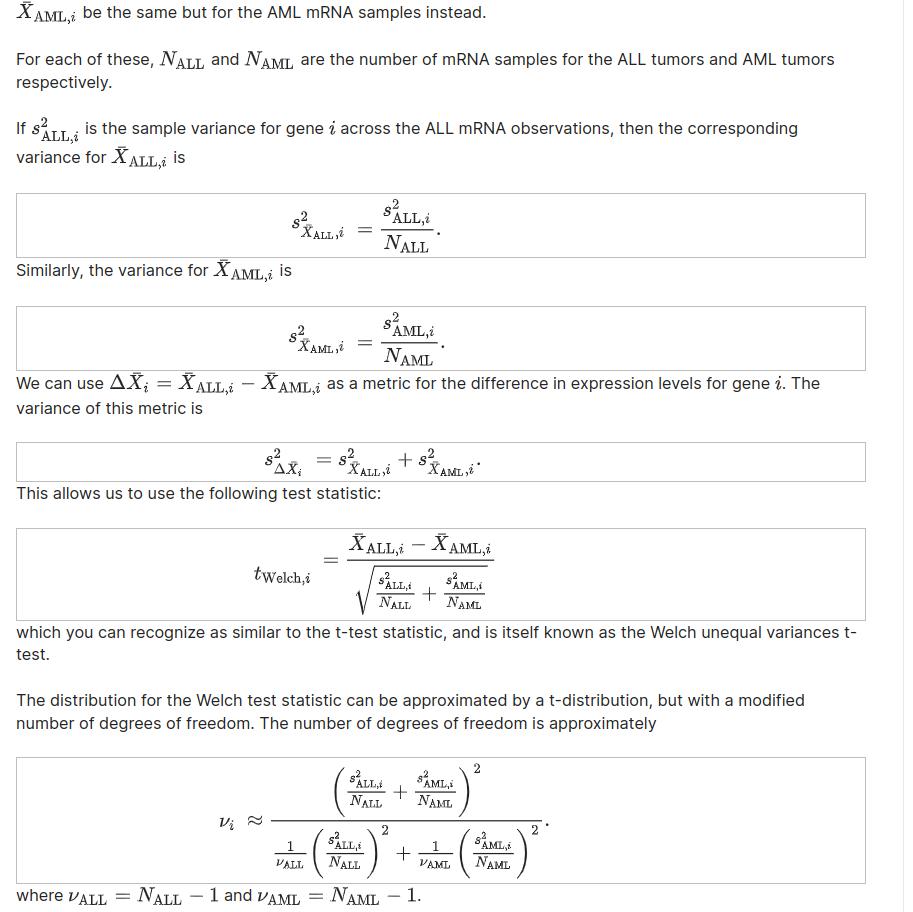

,GeneID,Mean_diff,Variance_X_ALL,Variance_X_AML,Mean_diff_Variance,N_AML,N_ALL,T_score,T_approximated_df,p-value
10,11,-0.679911,0.005902,0.021202,0.027104,11,27,-4.129876,15.869570,7.982573e-04
11,12,-0.725802,0.001508,0.063444,0.064952,11,27,-2.847884,10.478682,1.657514e-02
12,13,-0.910656,0.006312,0.047589,0.053901,11,27,-3.922442,12.742549,1.815017e-03
17,18,-0.469621,0.012926,0.019482,0.032408,11,27,-2.608686,23.664449,1.549732e-02
22,23,0.591253,0.009345,0.007860,0.017205,11,27,4.507564,31.039693,8.740984e-05
...,...,...,...,...,...,...,...,...,...,...
3000,3001,0.290004,0.012319,0.001118,0.013437,11,27,2.501839,30.283415,1.798170e-02
3014,3015,-0.499724,0.013222,0.009363,0.022584,11,27,-3.325266,32.928761,2.177381e-03
3030,3031,-0.330458,0.005870,0.002643,0.008513,11,27,-3.581604,35.809641,1.006252e-03
3045,3046,0.928864,0.013166,0.008616,0.021782,11,27,6.293616,33.671825,3.740314e-07


In [96]:

# 
# The WELCH test is now based on the difference between
print("Preparing for Welch Test setup..")
from IPython.display import display
from PIL import Image
from math import sqrt
from scipy.stats import t
img = Image.open("Homework1/Welch_test_setup.png")
display(img)
#
welch_df = pd.DataFrame()
welch_df['GeneID'] = df[df.columns.to_list()[0]]
welch_df['Mean_diff'] = df_ALL['X_ALL']  - df_AML['X_AML']
welch_df['Variance_X_ALL'] = df_ALL['Variance_X_ALL']
welch_df['Variance_X_AML'] = df_AML['Variance_X_AML']
welch_df['Mean_diff_Variance'] = welch_df['Variance_X_ALL'] + welch_df['Variance_X_AML']
welch_df['N_AML'] = N_AML
welch_df['N_ALL'] = N_ALL

def T_Welch(row):
    return row['Mean_diff'] / sqrt(row['Mean_diff_Variance'])

def T_degree(row):
    num = (row['Variance_X_ALL'] + row['Variance_X_AML'])**2
    den1 =  (row['Variance_X_ALL']**2) / (row['N_ALL'] -1 )
    den2 =  (row['Variance_X_AML']**2) / (row['N_AML'] -1 )
    # return the integer approximation
    return num/(den1 + den2)


welch_df['T_score'] = welch_df.apply(T_Welch, axis=1)
welch_df['T_approximated_df'] = welch_df.apply(T_degree, axis=1)
#
# now we get the t-value fo 2 sided test
welch_df['p-value'] = t.sf(np.abs(welch_df['T_score']),welch_df['T_approximated_df']) * 2
significant_welch_df = welch_df[welch_df['p-value'] <= 0.025]
significant_welch_df



In [97]:
significant_welch_df.shape

(886, 10)

In [98]:
#
#
# HOLM BONFERRONI CORRECTION
#
p_values = significant_welch_df['p-value'].to_list()
sorted_p_values = sorted(p_values)
m  = len(p_values)
a = 0.05
print(f"Tesing Holm Bonferroni process with {m} p-values (sorted) and significance level a: {a}")
for i,p in enumerate(sorted_p_values):
  #
  # note i goes from 0 to m-1
  # if p =< a/(m - i) we reject null zero for that test and proceed
  # in this case we actually just keep running
  # if p > a/(m - i), we stop the process and we fail to reject all the tests after i 
  if p > a/(m - i):
    print(f"Fail to reject test: {i+1} .. All the remaining tests are also considered a Fail to reject")
    break
holm_result = i
print(f"Rejected all tests up to: {i+1} ... so  a total of {i}")    
print("----------------\n")

#
#
#  BENJAMINI-HOCHBER CORRECTION
#  
# 1) Order p-values
# 2) For each p-value:
#    Calculate the ratio q(i) = (m * p(i)) / (i).
# 3) Identify the largest significant q-value:
# 4) Find the largest index j such that q(j) ≤ α.
#    - Reject null hypotheses: Reject the null hypothesis (H₀) for all tests with p(i) ≤ q(j). These tests are considered significant after controlling FWER.
#    - Remaining tests: Tests with p(i) > q(j) are considered inconclusive, but unlike Holm-Bonferroni, 
#     they are not automatically excluded. You might consider them for further investigation depending on the context.
print(f"Tesing Benjamini-Hoch process with {m} p-values (sorted) and significance level a: {a}")
q_i = [(m * p) / (i +1) for i,p in enumerate(sorted_p_values) ]
largest_i_with_test_rejected = -1
for i,q in enumerate(q_i):
  if q <= a:
      largest_i_with_test_rejected = i + 1
print(f"The largest value for which we rejected H0 is: {largest_i_with_test_rejected}")    
print("Last Q_i ",q_i[-1])
print("Last p_i", p_values[-1])

Tesing Holm Bonferroni process with 886 p-values (sorted) and significance level a: 0.05
Fail to reject test: 150 .. All the remaining tests are also considered a Fail to reject
Rejected all tests up to: 150 ... so  a total of 149
----------------

Tesing Benjamini-Hoch process with 886 p-values (sorted) and significance level a: 0.05
The largest value for which we rejected H0 is: 886
Last Q_i  0.02499516524039415
Last p_i 0.006261953851060042


In [99]:
#
# going to cross checks results with library modules:
#
from statsmodels.stats.multitest import multipletests

# multipletests(pvals, alpha=0.05, method='hs', maxiter=1, is_sorted=False, returnsorted=False)
# Parameters
# pvals array_like, 1-d uncorrected p-values. Must be 1-dimensional.
# alpha float FWER, family-wise error rate, e.g. 0.1
# method str
# Method used for testing and adjustment of pvalues. Can be either the full name or initial letters. Available methods are:
#   bonferroni : one-step correction
#   sidak : one-step correction
#   holm-sidak : step down method using Sidak adjustments
#   holm : step-down method using Bonferroni adjustments
#   simes-hochberg : step-up method (independent)
#   hommel : closed method based on Simes tests (non-negative)
#   fdr_bh : Benjamini/Hochberg (non-negative)

result = multipletests(p_values, alpha=0.05, method='holm', is_sorted=False, returnsorted=True)
#
# The function sum considers True == 1 and False == 0 so this is a quick way to count the True values
holm_lib_result = sum(result[0])
assert holm_lib_result == holm_result, "The Holm Bonferroni correction gives a different result between library function and above computation"




result = multipletests(p_values, alpha=0.05, method='fdr_bh', is_sorted=False)
benj_hoch_lib_result = sum(result[0])
benj_hoch_lib_result


# print("All good.. manual work match library functions")

886

In [ ]:
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
##


In [234]:
#
# PROBLEM 1.6
#
import pandas as pd
import numpy as np
original_X = pd.read_csv('Homework1/data_and_materials/syn_X.csv', header=None)
original_Y = pd.read_csv('Homework1/data_and_materials/syn_y.csv', header=None)
print(f"Starting X.shape:  {original_X.shape}")
print(f"Starting Y.shape:  {Y.shape}")
normalized_X = original_X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
normalized_Y = (original_Y - original_Y.mean()) / Y.std()

X = original_X.copy()

X.insert(0, "", np.ones((X.shape[0],1)))
print(f"Added column for intercept to X matrix; X.shape:  {X.shape}")
#
#
Step1_M = np.matmul(X.T,X)
Step2_M = np.linalg.inv(Step1_M)
Step3_M = np.matmul(Step2_M,X.T)
Beta = np.matmul(Step3_M,Y)
print(f"The vector Beta is: {Beta[0]}")

Starting X.shape:  (100, 2)
Starting Y.shape:  (100,)
Added column for intercept to X matrix; X.shape:  (100, 3)
The vector Beta is: -0.10271703093983309


/tmp/ipykernel_1778979/2369363034.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


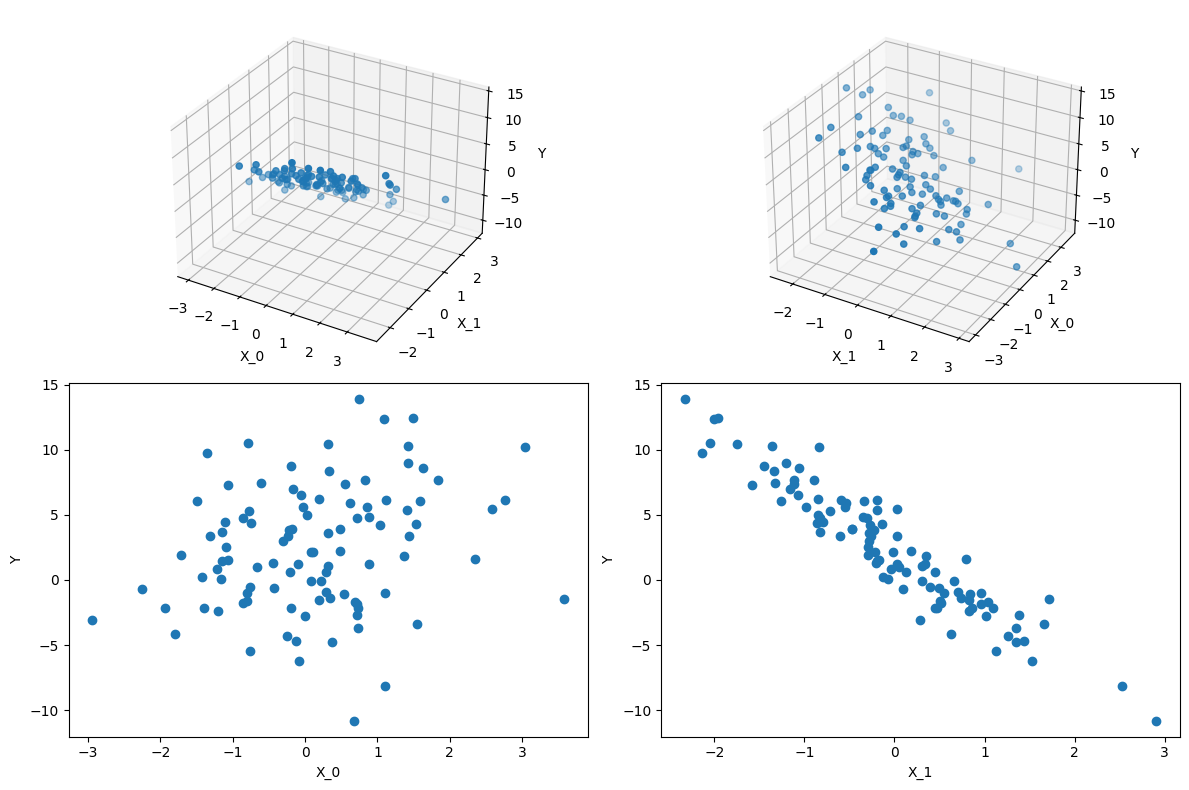

In [235]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(221, projection='3d')
ax.scatter(original_X[0].to_list(), original_X[1].to_list(), original_Y[0].to_list(), 'gray')
ax.set_xlabel('X_0')
ax.set_ylabel('X_1')
ax.set_zlabel('Y')

ax = fig.add_subplot(222, projection='3d')
ax.scatter(original_X[1].to_list(), original_X[0].to_list(), original_Y[0].to_list(), 'gray')
ax.set_xlabel('X_1')
ax.set_ylabel('X_0')
ax.set_zlabel('Y')


ax = fig.add_subplot(223)

ax.scatter(original_X[0].to_list(), original_Y[0].to_list())
ax.set_xlabel('X_0')
ax.set_ylabel('Y')

ax = fig.add_subplot(224)
ax.scatter(original_X[1].to_list(), original_Y[0].to_list())
ax.set_xlabel('X_1')
ax.set_ylabel('Y')

fig.tight_layout()
fig.show()


In [236]:
# so we have Beta
weights = np.array(Beta[1:])
b = np.array(Beta[0])
m = len(original_X)
#
# Hessian
H = np.matmul(original_X.T,original_X)/m
N1 = (np.matmul(H,weights) - b).T
N2 = (np.matmul(H,weights) -b)
N = np.matmul(N1,N2)
D_temp = np.matmul(N1,H)
D = np.matmul(D_temp,N2)
print(N)
print(D)
print(f"Best alpha is : {N/D}")

0.8645668856780702
0.8697835000869747
Best alpha is : 0.9940023989781562


In [264]:
import random
import math
#
tolerance = 0.000001
step = 0.5
#
#
#
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta

def predict_Y(b,theta,X):
    return b + np.dot(X,theta)

def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)

def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db    
    print(np.dot((y_hat-y),x))
    theta_1= theta_o - learning_rate*dw
    return b_1,theta_1

#
#
#
#b,theta=initialize(2)
#print("After initialization -Bias: ",b,"theta: ",theta)
#Y_hat=predict_Y(b,theta,normalized_X)
#print("Cost is: ",get_cost(Y,Y_hat))
#b,theta=update_theta(normalized_X,Y,Y_hat,b,theta, step)
#print("After first update -Bias: ",b,"theta: ",theta)
#Y_hat=predict_Y(b,theta,normalized_X)
#print("Cost is: ",get_cost(Y,Y_hat))
def distance(v1,v2):
    return sum([ (x-y)**2 for x,y in zip(v1,v2) ] ) / len(v1)

def run_gradient_descent(X, Y, alpha, num_iterations):
    b,theta=initialize(X.shape[1])
    gd_iterations_df = pd.DataFrame(columns=['iteration','cost','b','theta', 'distance'])
    result_idx=0
    for iter in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)        
        dist = distance( [b] + list(theta) ,
                         [prev_b] + list(prev_theta) )
        gd_iterations_df.loc[result_idx]=[iter,this_cost,prev_b,prev_theta, dist]
        if dist <=  0.000001:
            print("Reached desiderd precision. Breaking at iteration: ",iter+1)
            break
        result_idx=result_idx+1
    print('Final Estimate of b and theta : ',b,theta)
    return gd_iterations_df,b,theta
    
    
gd_iterations_df,b,theta=run_gradient_descent(normalized_X,Y,alpha=0.51,num_iterations=200)

[ 43.46867256 130.00295325]
[-10.32760818  -4.58480041]
[0.45040978 0.83152858]
[-0.06774701 -0.04245423]
Reached desiderd precision. Breaking at iteration:  4
Final Estimate of b and theta :  4.4893378307345586e-08 [ 0.30817816 -0.96915437]


In [257]:
gd_iterations_df[:20]

,iteration,cost,b,theta,distance
0,0,2.002087,3.206654e-01,"[0.5616344508082403, 0.3695444655927038]",6.776994e-01
1,1,0.020138,0.000000e+00,"[0.21071161181536668, -0.9747490066621995]",3.182255e-03
2,2,0.010680,1.998401e-17,"[0.30758228004798804, -0.9619881406316964]",1.683104e-05
3,3,0.010629,4.080070e-17,"[0.30759811859594216, -0.9690939730790367]",9.564124e-08


In [232]:

print(b,theta)


4.098398155356967e-17 [ 0.30814284 -0.96920803]


In [231]:
Beta

,0
0,1.929606
1,1.263971
2,-4.597993


In [268]:

# returns a 3-tuple of (list of city names, list of variable names, numpy record array with each variable as a field)

import io
import csv
fields, cities, values = None, [], []
with open('Homework1/data_and_materials/mortality.csv') as wrap:
    csv_reader = csv.reader(wrap, delimiter=',', quotechar='"')
    fields = next(csv_reader)[1:]
    for row in csv_reader:
        cities.append(row[0])
        values.append(tuple(map(float, row[1:])))
dtype = np.dtype([(name, float) for name in fields])

print(cities)
print("------")
print(fields)
print("------")
print(np.array(values, dtype=dtype).view(np.recarray))


['Akron, OH', 'Albany-Schenectady-Troy, NY', 'Allentown, Bethlehem,PA-NJ', 'Atlanta, GA', 'Baltimore, MD', 'Birmingham, AL', 'Boston, MA', 'Bridgeport-Milford, CT', 'Buffalo, NY', 'Canton, OH', 'Chattanooga, TN-GA', 'Chicago, IL', 'Cincinnati, OH-KY-IN', 'Cleveland, OH', 'Columbus, OH', 'Dallas, TX', 'Dayton-Springfield, OH', 'Denver, CO', 'Detroit, MI', 'Flint, MI', 'Grand Rapids,MI', 'Greensboro-Winston-Salem-High Point,NC', 'Hartford, CT', 'Houston, TX', 'Indianapolis, IN', 'Kansas City,MO', 'Lancaster, PA', 'Los Angeles,Long Beech, CA', 'Louisville, KY-IN', 'Memphis, TN-AR-MS', 'Miami-Hialeah, FL', 'Milwaukee, WI', 'Minneapolis-St. Paul,MN-WI', 'Nashville, TN', 'New Haven-Meriden,CT', 'New Orleans,LA', 'New York,NY', 'Philadelphia, PA-NJ', 'Pittsburgh, PA', 'Portland, OR', 'Providence, RI', 'Reading, PA', 'Richmond-Petersburg, VA', 'Rochester, NY', 'St. Louis,MO-IL', 'San Diego,CA', 'San Francisco,CA', 'San Jose,CA', 'Seattle, WA', 'Springfield, MA', 'Syracuse, NY', 'Toledo, OH', '